In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
N = 1000

x = np.linspace(0, 10, N)

y = 4.53098 + 3.91034*x + np.random.randn(N)

X = np.vstack((np.array([1]*N), x)).T

print(X[:10,:])
print(y[:10])

[[1.         0.        ]
 [1.         0.01001001]
 [1.         0.02002002]
 [1.         0.03003003]
 [1.         0.04004004]
 [1.         0.05005005]
 [1.         0.06006006]
 [1.         0.07007007]
 [1.         0.08008008]
 [1.         0.09009009]]
[3.76874024 4.6026228  3.5073231  5.17337041 6.06542228 5.36162604
 4.10436333 5.57094213 3.12516771 4.97823649]


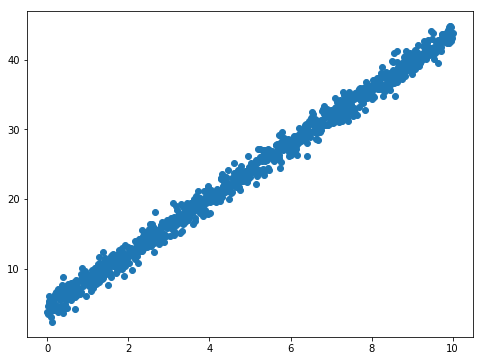

In [3]:
plt.figure(figsize = (8,6))
plt.scatter(X[:,1], y)

In [4]:
N = X.shape[0]                 # In R: N <- nrow(X)

np.random.seed(101)            # In R: seed(101)

idx = np.random.permutation(N) # In R: idx <- sample(1:N)
X = X[idx,:]                   # In R: X = X[idx,]
y = y[idx]                     # In R: y = y[idx]

X_train = X[:int(0.6*N),:]
y_train = y[:int(0.6*N)]

X_cv = X[int(0.6*N):int(0.8*N),:]
y_cv = y[int(0.6*N):int(0.8*N)]

X_test = X[int(0.8*N):,:]
y_test = y[int(0.8*N):]

In [5]:
y_train[2:10] += 30

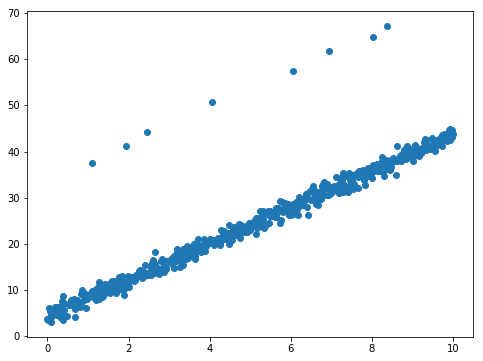

In [6]:
plt.figure(figsize = (8,6))
plt.scatter(X_train[:,1], y_train)

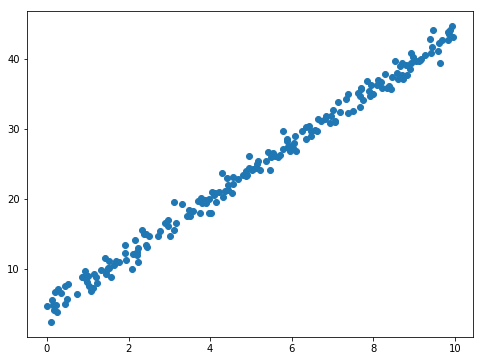

In [7]:
plt.figure(figsize = (8,6))
plt.scatter(X_cv[:,1], y_cv)

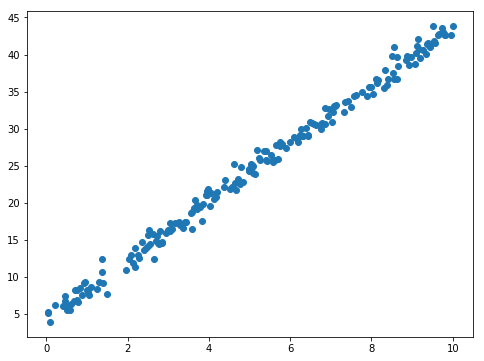

In [8]:
plt.figure(figsize = (8,6))
plt.scatter(X_test[:,1], y_test)

前面是随便 生成的数据 - 代表，在这之前你需要clean 好你的数据，并且分好你的 联系数据，validation数据，和测试数据

重点！！！！！！！ w 只能来自于 training！！！！！

In [9]:
def OLS(y, y_hat):
    return (y - y_hat).dot(y - y_hat)

这一步是为了简单并且快速的找到一个合适的 eta （训练速度）

In [10]:
w_0 = np.random.randn(X.shape[1])

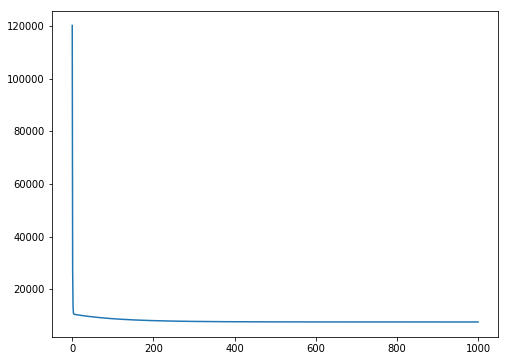

In [11]:
w = w_0.copy()

J = []
eta = 3e-5
epochs = int(1e3)

check_point = 10

for t in range(epochs):
    y_hat_train = X_train.dot(w)
    J.append(OLS(y_train, y_hat_train))
    w -= eta*(X_train.T.dot(y_hat_train - y_train))
    
    #if t % check_point == 0:
    #    w.savetxt("w_checkpoint.csv")
    
plt.figure(figsize = (8,6))
plt.plot(J)


这一步是 是测试 你的 model 是 under fiting or over fitting

如果underfiting:

training error 和 validation error  都很高
但是两者很接近
这时候你就需要做下一步 code 就是需要做 regularization
就是所谓的L1,L2 regularization 或者 L1 + L2 

如果overfitting:

training error 低
validation error 高   
两者有差距
这时候需要的 feature engineering 简单说就是你需要更多的列data



In [12]:
N_train = X_train.shape[0]
N_cv = X_cv.shape[0]

J_train = (1/N_train)*OLS(y_train, y_hat_train)

y_hat_cv = X_cv.dot(w)

J_cv = (1/N_cv)*OLS(y_cv, y_hat_cv)

print("Training Error: {}".format(J_train))
print("Validation Error: {}".format(J_cv))


Training Error: 12.573975338771676
Validation Error: 1.2350096515176752


以下就是 当你underfit 时 所需要做的 regularization

以下是L2 regularization 的例子

用 regularization 之后得到的 J【】 找到 最低的 validation error 并且找到它的 L2 （如果是L1 regularization 的话就是找L1）


In [13]:
cv = []

for lambda2 in range(1000):
    w = w_0.copy()
    
    eta = 3e-5
    epochs = int(1e3)
    
    for t in range(epochs):
        y_hat_train = X_train.dot(w)
        w -= eta*(X_train.T.dot(y_hat_train - y_train) + lambda2*w)
        
    y_hat_cv = X_cv.dot(w)
    
    J_train = (1/N_train)*OLS(y_train, y_hat_train)
    J_cv = (1/N_cv)*OLS(y_cv, y_hat_cv)
    
    cv.append((J_train, J_cv, lambda2))

In [14]:
for i in cv[:10]:
    print(i)

(12.573975338771676, 1.2350096515176752, 0)
(12.57481162492195, 1.2284718204878482, 1)
(12.575975312439162, 1.2223302899841249, 2)
(12.577455041390898, 1.2165726965922878, 3)
(12.579239818873466, 1.2111870609317184, 4)
(12.581319006804828, 1.2061617751408387, 5)
(12.58368231014206, 1.201485590792585, 6)
(12.586319765507968, 1.1971476072244565, 7)
(12.589221730211959, 1.193137260268148, 8)
(12.592378871650864, 1.189444311364383, 9)


In [15]:
J_train = [i for i,j,k in cv]
J_cv = [j for i,j,k in cv]
lambda2 = [k for i,j,k in cv]

o = J_cv.index(min(J_cv))

lambda2[o]

23

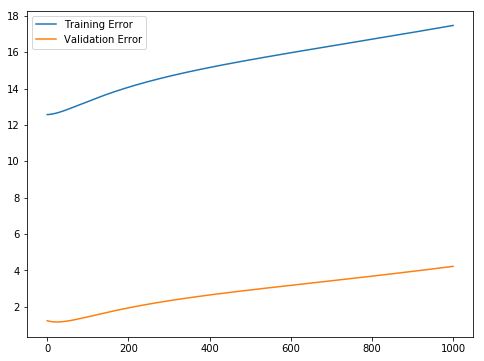

In [16]:
plt.figure(figsize = (8,6))
plt.plot(lambda2, J_train, label = "Training Error")
plt.plot(lambda2, J_cv, label = "Validation Error")
plt.legend()

最后，用 找到的最低的 L2 带入 test data 并得到最后的结果

In [17]:
w = w_0.copy()


eta = 3e-5
epochs = int(1e3)

for t in range(epochs):
    y_hat_train = X_train.dot(w)
    w -= eta*(X_train.T.dot(y_hat_train - y_train) + 14*w)
y_hat_test = X_test.dot(w)

N_test = X_test.shape[0]
J_test = (1/N_test)*OLS(y_test, y_hat_test)

print("Test Error: {}".format(J_test))

Test Error: 0.9190087338852628


In [18]:
#Test Error: 0.9493698270048387
# R2 = 0.9924357491395039
0.992112106964614

0.992112106964614

In [19]:
def R2 (y, y_hat):
    return 1 - OLS(y, y_hat) / OLS(y,y.mean())

R2(y_test,y_hat_test)

0.992702685049166